# Analyse de la loi de Zipf sur un corpus de Victor Hugo

## 1. Chargement du corpus

### 1.1 Import des bibliothèques

In [1]:
import os
import re
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Je télécharge les ressources NLTK nécessaire
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\safar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\safar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 1.2 Lecture du fichier texte

In [12]:
# Je défini le chemin vers le fichier (relatif n'a pas fonctionné donc obligé absolu)
# fichier_path = os.path.join("..", "data", "raw", "Corpus_Victor_Hugo.txt")
fichier_path = "C:/code/projets_perso/zipf-law-project/data/raw/Corpus_Victor_Hugo.txt"


# Lecture du contenu
with open(fichier_path, "r", encoding="utf-8") as file:
    texte = file.read()
    
# Aperçu du txt brut
print(texte[:5000])

                    IL A ÉTÉ TIRÉ À PART


      5 exemplaires sur papier du Japon, numérotés de 1 à 5
     5 exemplaires sur papier de Chine, numérotés de 6 à 10
  40 exemplaires sur papier de Hollande, numérotés de 11 à 50
300 exemplaires sur papier vélin du Marais, numérotés de 51 à 350
       VICTOR HUGO


HISTOIRE D’UN CRIME
TROISIÈME JOURNÉE – LE MASSACRE
QUATRIÈME JOURNÉE – LA VICTOIRE
    CONCLUSION — LA CHUTE



            CAHIER

    COMPLÉMENTAIRE

       I. NOTES DE VICTOR HUGO



       II. PIÈCES JUSTIFICATIVES
                PARIS


  IMPRIMÉ                     ÉDITÉ
    PAR                        PAR

L’IMPRIMERIE               LA LIBRAIRIE
 NATIONALE                 OLLENDORFF




               MDCCCCVII
 FAC-SIMILÉ DU TITRE ÉCRIT PAR VICTOR HUGO EN
TÊTE DU MANUSCRIT ORIGINAL DE L’HISTOIRE D’UN
                     CRIME.
            TROISIÈME JOURNÉE.

                    LE MASSACRE.




                                     I

 CEUX QUI DORMENT ET CELUI
   

## 2. Prétraitement du texte

### 2.1 Nettoyage (ponctuation, majuscules...) et Tokenisation

In [14]:
import re
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords

# Nettoyage du texte : minuscules + suppression ponctuation et chiffres
texte_nettoyé = texte.lower()
texte_nettoyé = re.sub(r'[^a-zàâçéèêëîïôûùüÿñæœ\s-]', ' ', texte_nettoyé)

# Tokenisation
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(texte_nettoyé)

# Chargement des stopwords français
stop_words = set(stopwords.words('french'))

# Filtrage des tokens : je retire les stopwords et les mots trop courts
tokens_filtrés = [mot for mot in tokens if mot not in stop_words and len(mot) > 1]

# Affichage des premiers mots utiles
print(tokens_filtrés[:30])


['tiré', 'part', 'exemplaires', 'papier', 'japon', 'numérotés', 'exemplaires', 'papier', 'chine', 'numérotés', 'exemplaires', 'papier', 'hollande', 'numérotés', 'exemplaires', 'papier', 'vélin', 'marais', 'numérotés', 'victor', 'hugo', 'histoire', 'crime', 'troisième', 'journée', 'massacre', 'quatrième', 'journée', 'victoire', 'conclusion']


### 2.2 Stopwords et filtrage

## 3. Analyse de fréquence des mots

### 3.1 Comptage des occurrences

In [16]:
from collections import Counter

# Comptage de la fréquence des occurences
compteur_mots = Counter(tokens_filtrés)


### 3.2 Classement des mots

In [19]:
# Obtenir les n mots les plus fréquents
mots_freq = compteur_mots.most_common(100)  # top 100
for rang, (mot, freq) in enumerate(mots_freq[:15], start=1):
    print(f"{rang}. {mot} - {freq} occurrences")

1. plus - 665 occurrences
2. cette - 591 occurrences
3. deux - 588 occurrences
4. rue - 581 occurrences
5. dit - 533 occurrences
6. tout - 439 occurrences
7. comme - 401 occurrences
8. général - 393 occurrences
9. où - 383 occurrences
10. fait - 365 occurrences
11. là - 339 occurrences
12. faire - 323 occurrences
13. tous - 311 occurrences
14. bien - 302 occurrences
15. coup - 297 occurrences


## 4. Visualisation : loi de Zipf

### 4.1 Graphique log-log

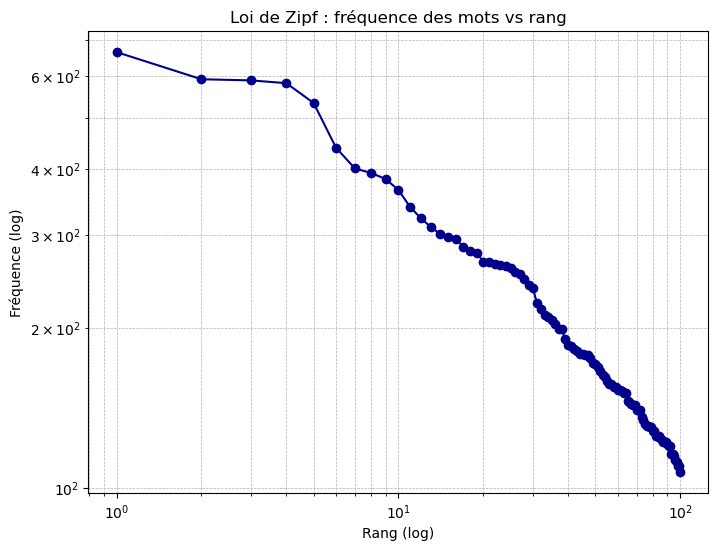

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Extraire les fréquences uniquement
frequences = [freq for mot, freq in mots_freq]
rangs = np.arange(1, len(frequences) + 1)

# Tracé log-log
plt.figure(figsize=(8, 6))
plt.plot(rangs, frequences, marker='o', linestyle='-', color='darkblue')
plt.xscale('log')
plt.yscale('log')
plt.title("Loi de Zipf : fréquence des mots vs rang")
plt.xlabel("Rang (log)")
plt.ylabel("Fréquence (log)")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

### 4.2 Comparaison avec la théorie

## 5. Conclusions et pistes futures